<h1><center> Article C</center></h1>
<h1><center>Customer Churn Prediction, Segmentation and Fraud Detection in Telecommunication Industry</center></h1>


## Sommaire
### 1- La compréhension du problème métier : voir le rapport
### 2-La compréhension des données
    1-chargement des données
    2.Exploration des données : EDA
    3.Visualisation
### 3-La préparation des données
    1.Equilibrage de la variable cible
    2.Feature Extraction : Réduction de dimension
    3.Réduction de modalités et Encodage
    4.Extraction de la variable cible : division des données Xi et y
    5.Division des données trainset(70%) et testset(30%)
    6.Standardisation : centrage reduction des données
### 4-Churn prediction : La modélisation & Evaluation
    Algorithmes supervisés :
        1.Arbre de decision
        2.Random forest
        3.AdaBoost
        4.Réseaux de neurones : ANN
    Algorithmes non supervisés :
        5.k-means
        6.CAH
### 5-Comparaison
    1.Comparaison des algorithmes supervisés
    2.Comparaison des algorithmes non supervisés

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

## 2-La compréhension des données

In [ ]:
#1-chargement des données
data = pd.read_excel('Telco_customer_churn.xlsx')
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
#2.Exploration des données : EDA
print(data.shape)
#print(data.columns)
print(data.dtypes)
#Détection des valeurs manquantes
print('valeurs manquantes = \n',data.isnull().sum())
#categorical cols
categorical_cols = data.columns[data.dtypes==object].tolist()
print('categorical cols = \n',categorical_cols)
print('categorical cols = \n',len(categorical_cols))
print('categorical cols(modalities) = \n',data[categorical_cols].nunique())
#numerical cols
numerical_cols = data.columns[data.dtypes!=object].tolist()
print('numerical cols = \n',numerical_cols)
print('numerical cols = \n',len(numerical_cols))
#description des variables quantitatives
print(data.describe())

(7043, 33)
CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object
valeurs manquantes

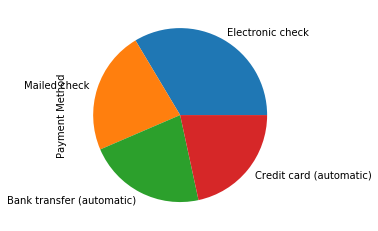

In [ ]:
#3.Visualisation
#pourcentage des modalités de la variable "Payment Method"
data["Payment Method"].value_counts().plot.pie()

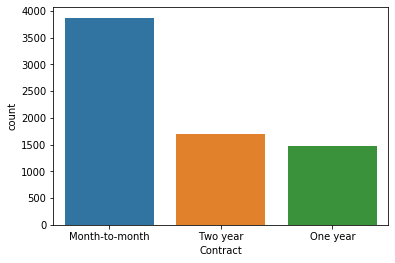

In [ ]:
#3.Visualisation
#modalité de la variable "Contract"
sns.countplot(data["Contract"],label="Count")

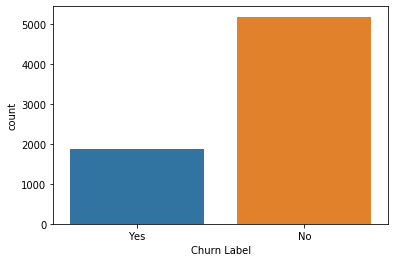

In [ ]:
#3.Visualisation
#cible : modalité de la cible "Churn Label"
sns.countplot(data["Churn Label"],label="Count")

#### >On remarque un déséquilibre entre les modalités de notre cible (no >>> yes)

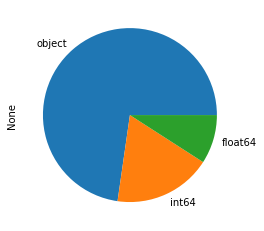

In [ ]:
#3.Visualisation
#statistique sur le nb de chaque type des colonnes
data.dtypes.value_counts().plot.pie()

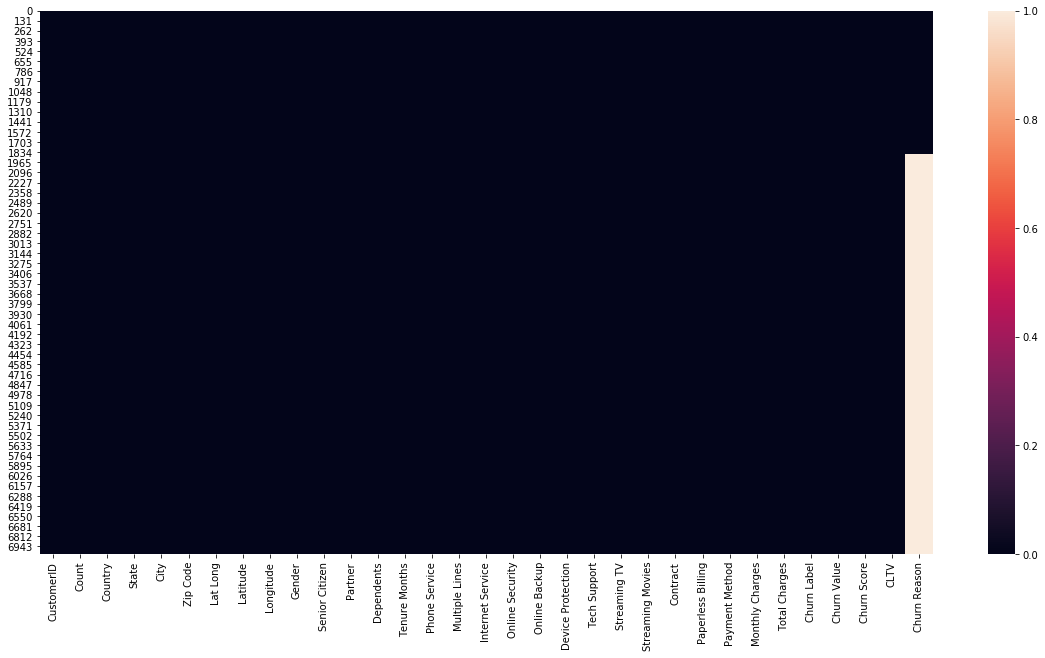

In [ ]:
#3.Visualisation
#statistique sur les valeurs manquantes pour chaque variable (bleu: pas de valeur manquante/blanc : existe une valeur manquante)
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())

C:\Users\nadhir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\nadhir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


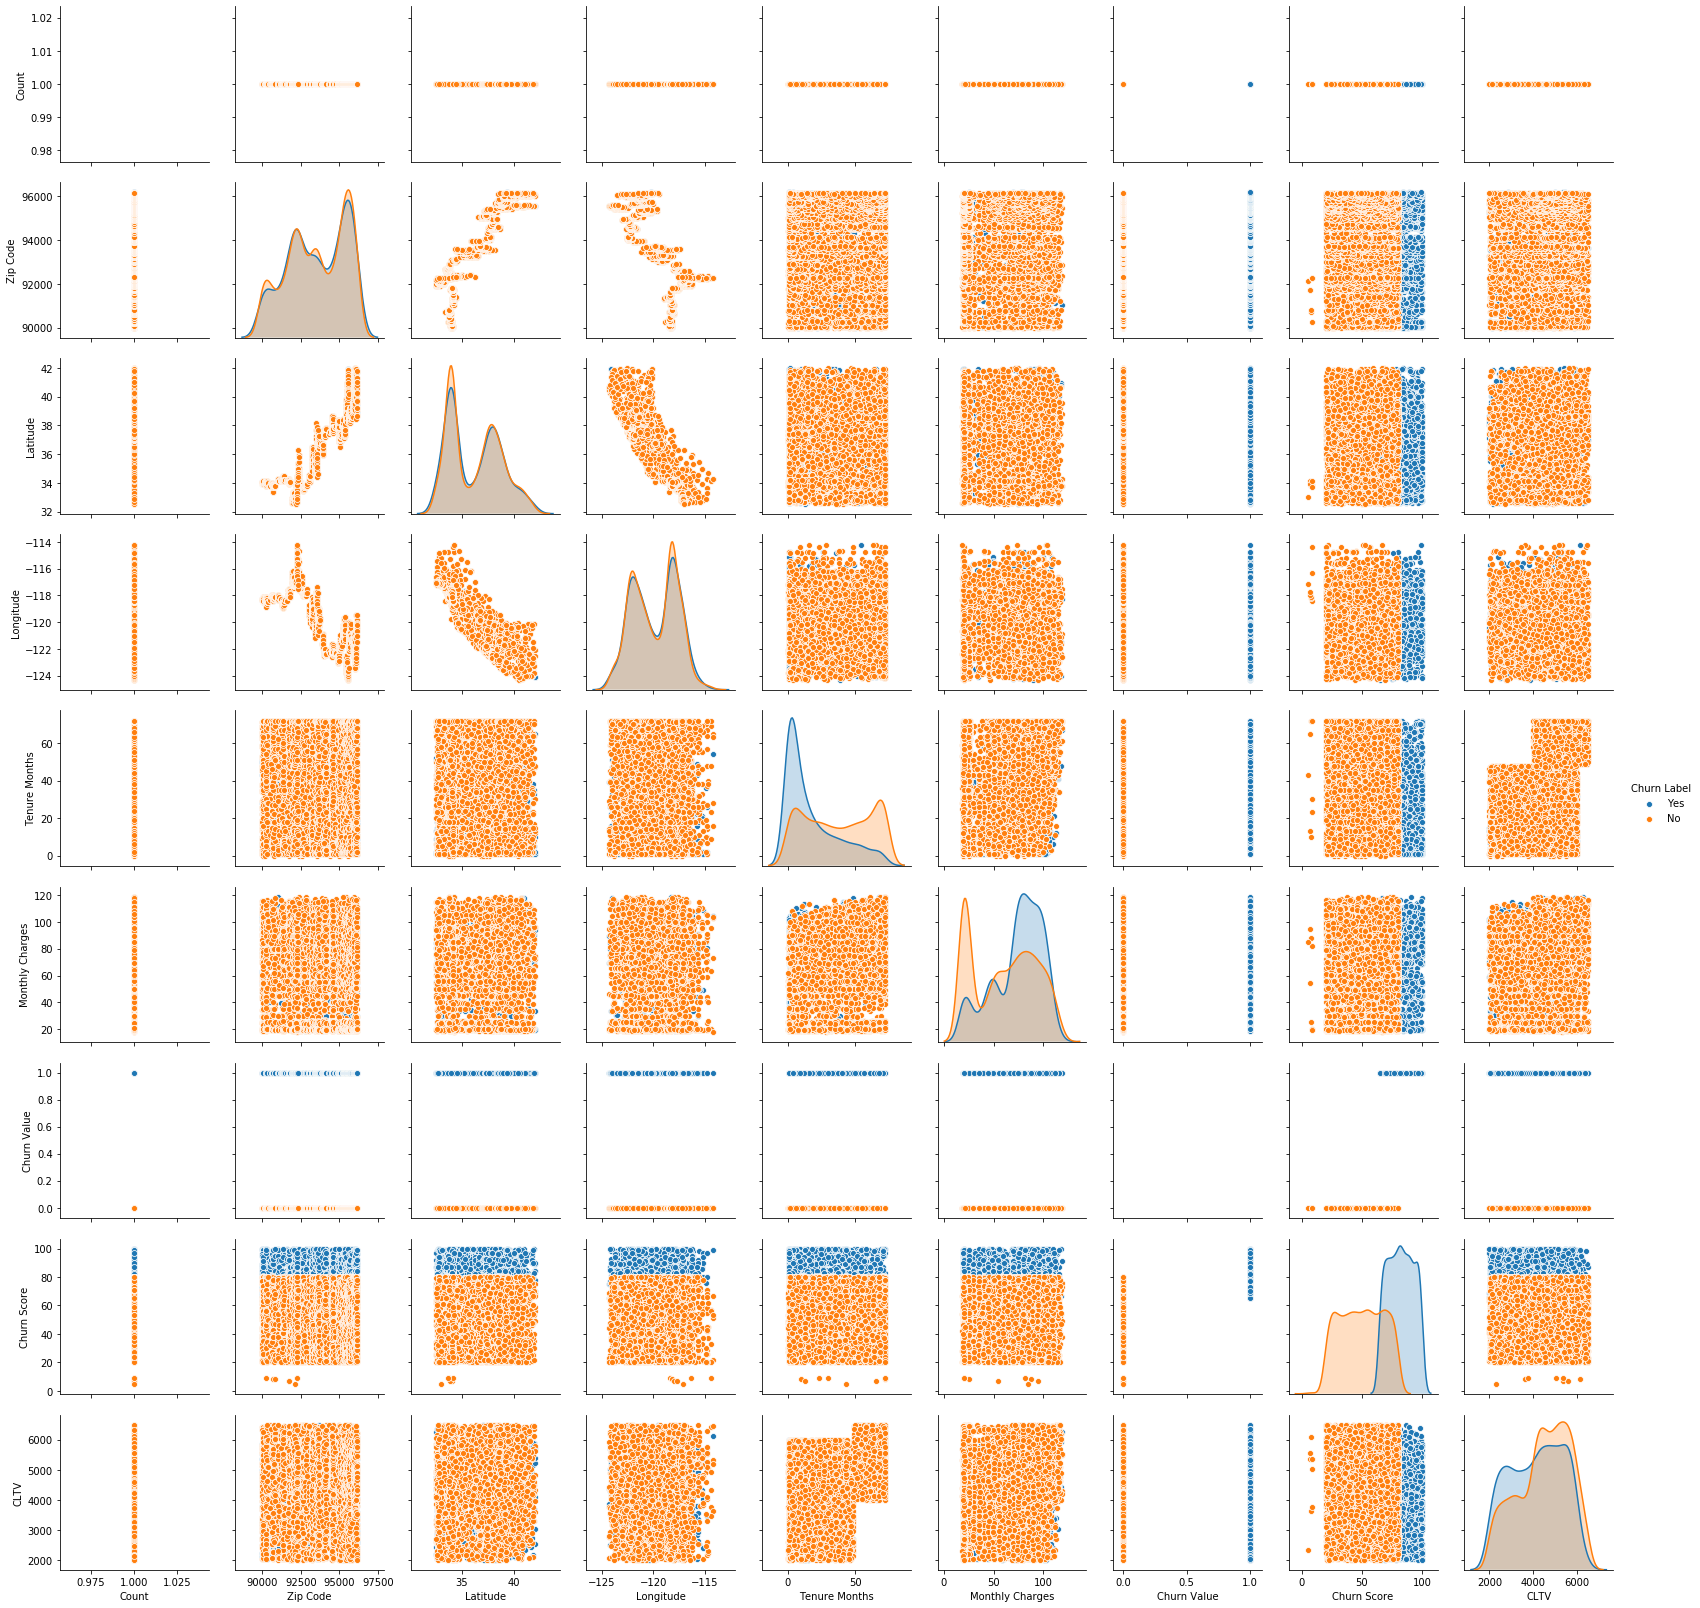

In [ ]:
#3.Visualisation
#tracage de la matrice col_j = f(col_i) afin de deceler les éventuelles de dépendances entre les colonnes numériques 2 par 2.
sns.pairplot(data, hue='Churn Label', height=2.5);
#Churn Value et Count sont 2 variables sans variance (toutes les observations sont ègales à 1). Ceci va entraîner 4 Warnings (2 warning par variables : 1 pour l'axe des X et un pour les Y) qu'on peut ignorer.

C:\Users\nadhir\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
C:\Users\nadhir\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


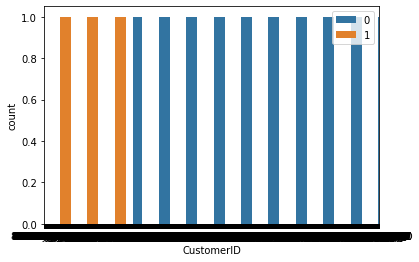

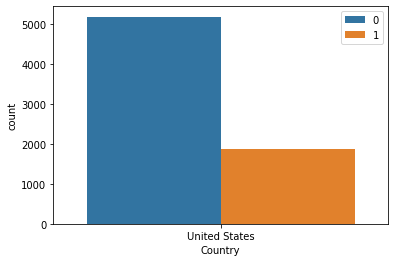

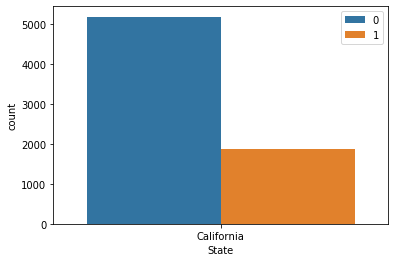

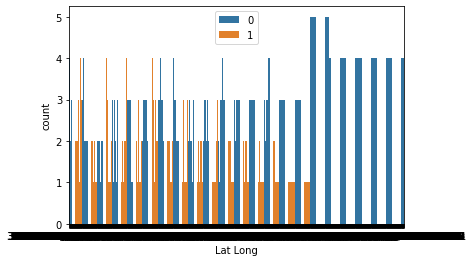

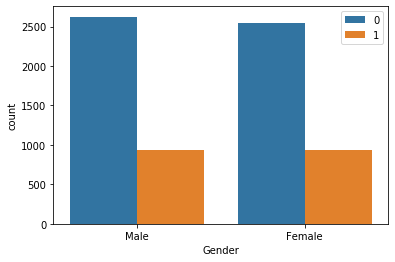

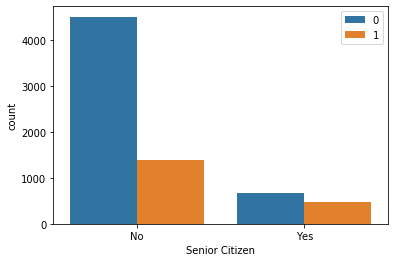

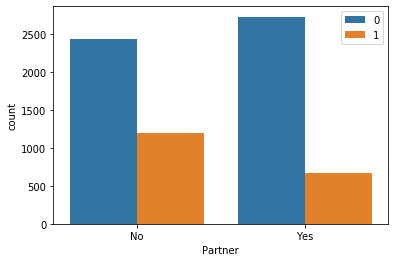

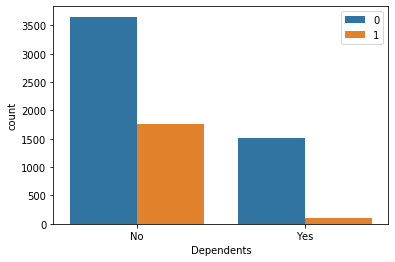

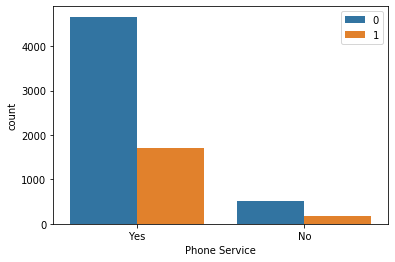

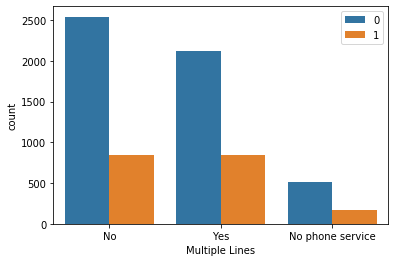

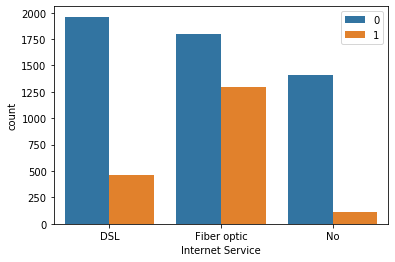

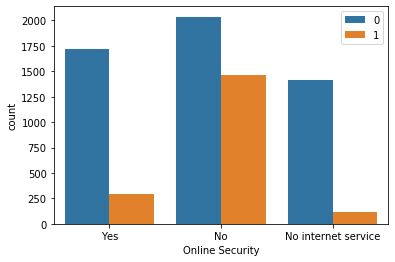

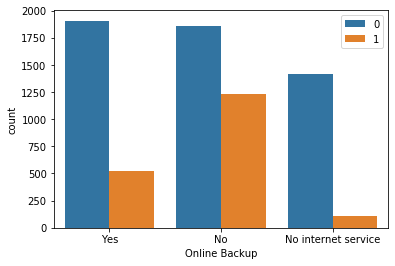

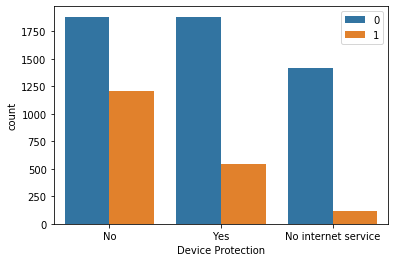

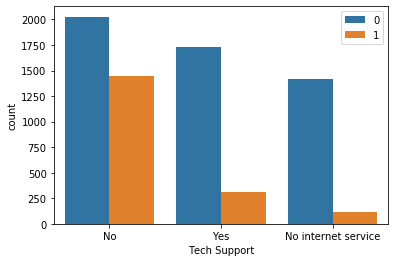

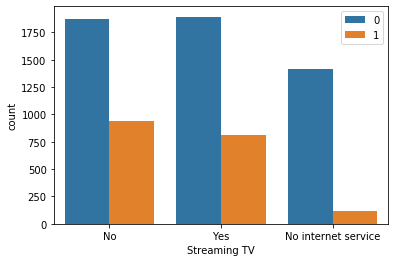

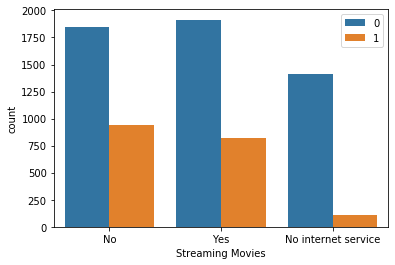

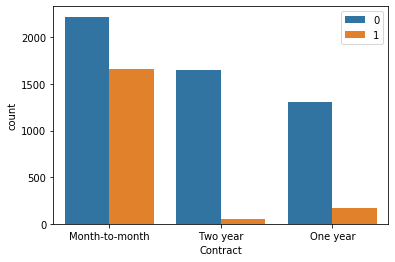

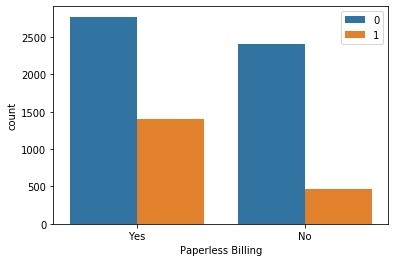

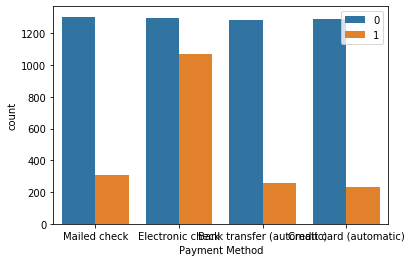

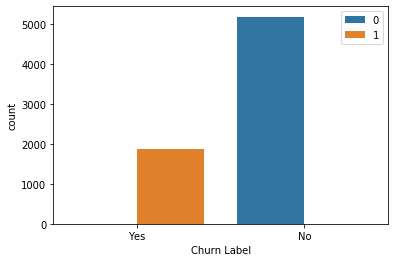

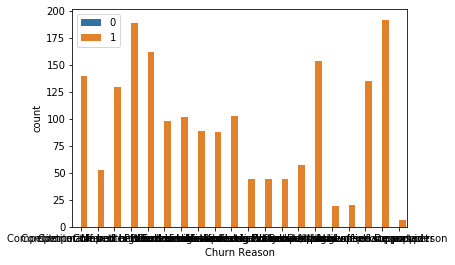

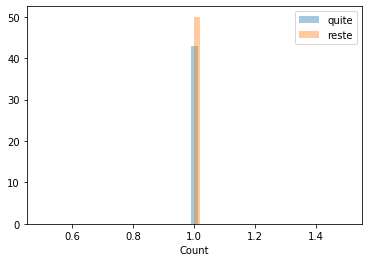

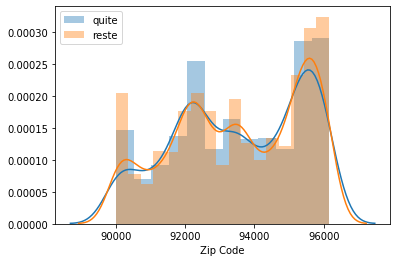

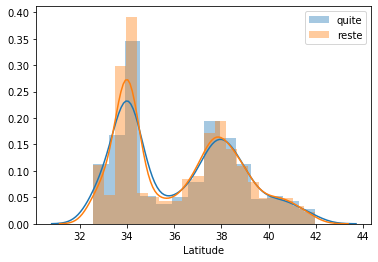

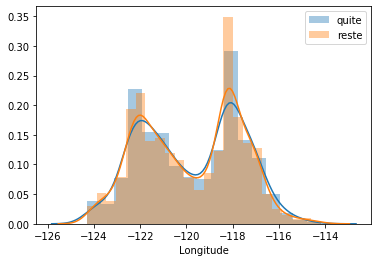

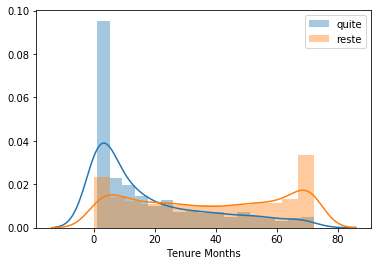

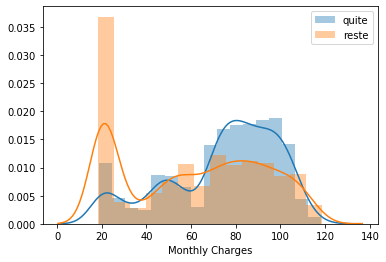

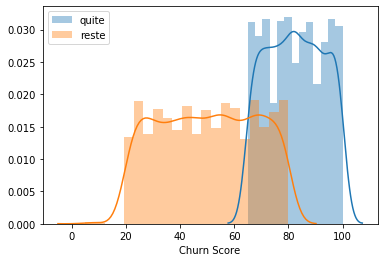

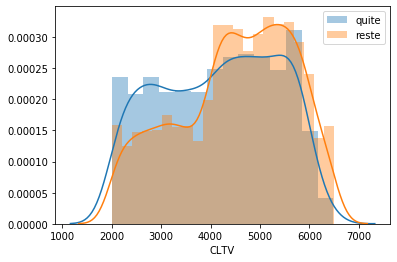

In [ ]:
#3.Visualisation
quite=data[data['Churn Value']==1]

reste=data[data['Churn Value']==0]

for col in (data.columns[data.dtypes==object].drop(['City','Total Charges'])): #.drop('Churn Value')):
    #plt.figure()
    #sns.distplot(quite[col],label='quite')
    #sns.distplot(reste[col],label='reste')
    #plt.legend()
    plt.figure()
    sns.countplot(x=col,hue='Churn Value',data=data)
    plt.legend()


for col in (data.columns[data.dtypes!=object].drop('Churn Value')): #.drop('Churn Value')):
    plt.figure()
    sns.distplot(quite[col],label='quite')
    sns.distplot(reste[col],label='reste')
    plt.legend()

Les clients sans personnes à leurs charge (enfants, seniors...) ont quatre fois plus de chances de rompre avec les services de la companie.<br>
Les seniors ont trois fois plus de chances de de rompre avec les services de la companie.<br>
Les client sans partenaires on deux fois plus de chances de quitter les services de la companie.<br>
La majorité des clients ayant résilié leurs abonnements ont utilisent un service téléphonique.<br>
Les clients ayant la fibre optique en tant que service sont plus prompts à "churner".<br>
Les clients qui n'ont pas les services suivants sont plus prompts à quitter les services de la companie :
Online Security, Device Protection, Online Backup, et Tech Support

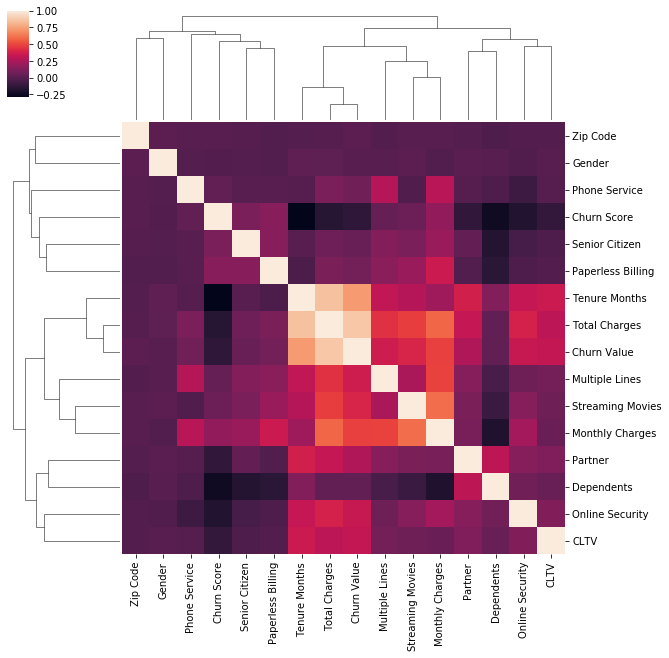

In [ ]:
##3.Visualisation : analyse de corrélation(Pearson)
sns.clustermap(data[data.columns[data.dtypes!=object].tolist()].corr())
#correlation entre 2 var :
#    ~ 1  : les var sont correlées ==> il existe une relation linéaire entre les 2 var
#    ~ -1 : les var sont correlées inversement ==> il existe une relation linéaire entre les 2 var
#    ~ 0  : pas de correlation ==> pas de relation linaire
#-> On constate qu'à part la diagonale (cas trivial), il n'y a pas de corrélation entre les variables.

    >Cette matrice a été réalisée afin d'extraire visuellement les variables les plus  prédictives
    >On relève une corrélation entre "senior citizen" et "monthly charges"

## 3-La préparation des données

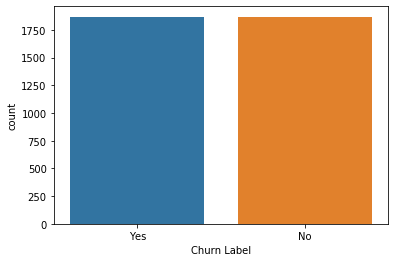

In [ ]:
#1.Equilibrage d'échantillon
data.shape
(data["Churn Label"]=='Yes').sum()#1869
(data["Churn Label"]=='No').sum()#5174
data_yes = data[data["Churn Label"]=='Yes']
data_no = data[data["Churn Label"]=='No'].sample(n = (data["Churn Label"]=='Yes').sum(),random_state=0)
data = pd.concat([data_yes, data_no])
data.shape

sns.countplot(data["Churn Label"],label="Count")

In [ ]:
#2.Feature Extraction : Réduction de dimension
data = data.drop(['Churn Reason'], axis=1) #Plus de 73% de valeurs manquantes
data = data.drop(['CustomerID'], axis=1)   #Variable non significative
data = data.drop(['Country'], axis=1)      #Ne présente qu'une une seule modalité
data = data.drop(['State'], axis=1)        #Ne présente qu'une une une seule modalité
data = data.drop(['Churn Label'], axis=1)  #Redondance avec la colonne churn value qui encode churn label
data = data.drop(['Latitude'], axis=1)     #Redondance avec la colonne City
data = data.drop(['Longitude'], axis=1)    #Redondance avec la colonne City
data = data.drop(['Lat Long'], axis=1)     #Redondance avec la colonne City
data = data.drop(['Count'], axis=1)        #Ne présente qu'une une seule modalite
data = data.drop(['City'], axis=1)         #Ne présente qu'une une seule modalite

In [ ]:
#3.Réduction de modalités et Encodage
#3.1.Réduction de modalités
#Verifier les modalités de chaque colonne qualitative
categorical_cols = data.columns[data.dtypes==object].tolist()
print('categorical cols(modalities) = \n',data[categorical_cols].nunique())

#Affichage des variables qualitatives ayant 3 modalités
for col in data.columns:
    if data[col].nunique() == 3:
        print(col,' ',data[col].unique())

#Reduction du nombre de modalités (3->2)
data["Streaming Movies"].replace({"No internet service": "No"}, inplace=True)
data["Multiple Lines"].replace({"No phone service": "No"}, inplace=True)
data["Online Security"].replace({"No internet service": "No"}, inplace=True)

#Conversion de la variable "Total Charges" qualitive -> qunatitative (float)
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce') #cast String to float
data.dropna(axis=0,inplace=True);

categorical cols(modalities) = 
 Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Total Charges        3485
dtype: int64
Multiple Lines   ['No' 'Yes' 'No phone service']
Internet Service   ['DSL' 'Fiber optic' 'No']
Online Security   ['Yes' 'No' 'No internet service']
Online Backup   ['Yes' 'No' 'No internet service']
Device Protection   ['No' 'Yes' 'No internet service']
Tech Support   ['No' 'Yes' 'No internet service']
Streaming TV   ['No' 'Yes' 'No internet service']
Streaming Movies   ['No' 'Yes' 'No internet service']
Contract   ['Month-to-month' 'Two year' 'One year']


In [ ]:
#3.Réduction de modalités et Encodage
#3.2.Encodage

#Encodage des v.qualitatives à 2 modalités
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))
print(data.shape)
data.head()

9 columns were label encoded.
(3734, 23)


,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,90003,1,0,0,0,2,1,0,DSL,1,...,No,0,Month-to-month,1,Mailed check,53.85,108.15,1,86,3239
1,90005,0,0,0,1,2,1,0,Fiber optic,0,...,No,0,Month-to-month,1,Electronic check,70.70,151.65,1,67,2701
2,90006,0,0,0,1,8,1,1,Fiber optic,0,...,Yes,1,Month-to-month,1,Electronic check,99.65,820.50,1,86,5372
3,90010,0,0,1,1,28,1,1,Fiber optic,0,...,Yes,1,Month-to-month,1,Electronic check,104.80,3046.05,1,84,5003
4,90015,1,0,0,1,49,1,1,Fiber optic,0,...,Yes,1,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,89,5340


In [ ]:
#4.Extraction de la variable cible : division des données Xi et y
X = data.drop(['Churn Value'],axis=1)
y = data['Churn Value']

X = pd.get_dummies(X, prefix_sep='_', drop_first=True)

In [ ]:
#5.Division des données trainset(70%) et testset(30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
#6.Standardisation : centrage reduction des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 4-La modélisation & Evaluation

# 1.Arbre de decision

In [ ]:
#modelisation
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
print('Le train score est :', dt.score(X_train, y_train))
print('Le test score est :', dt.score(X_test, y_test))

Le train score est : 1.0
Le test score est : 0.8947368421052632


[[494  68]
 [ 50 509]]


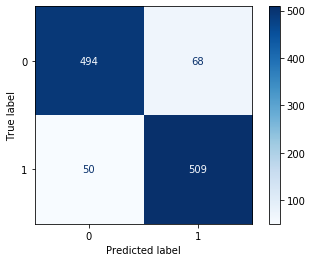

In [ ]:
#evaluation
#matrice de confusion
from sklearn.metrics import confusion_matrix
y_pred_dt = dt.predict(X_test)

print(confusion_matrix(y_test, y_pred_dt))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
#on constate que les faux positifs = 50

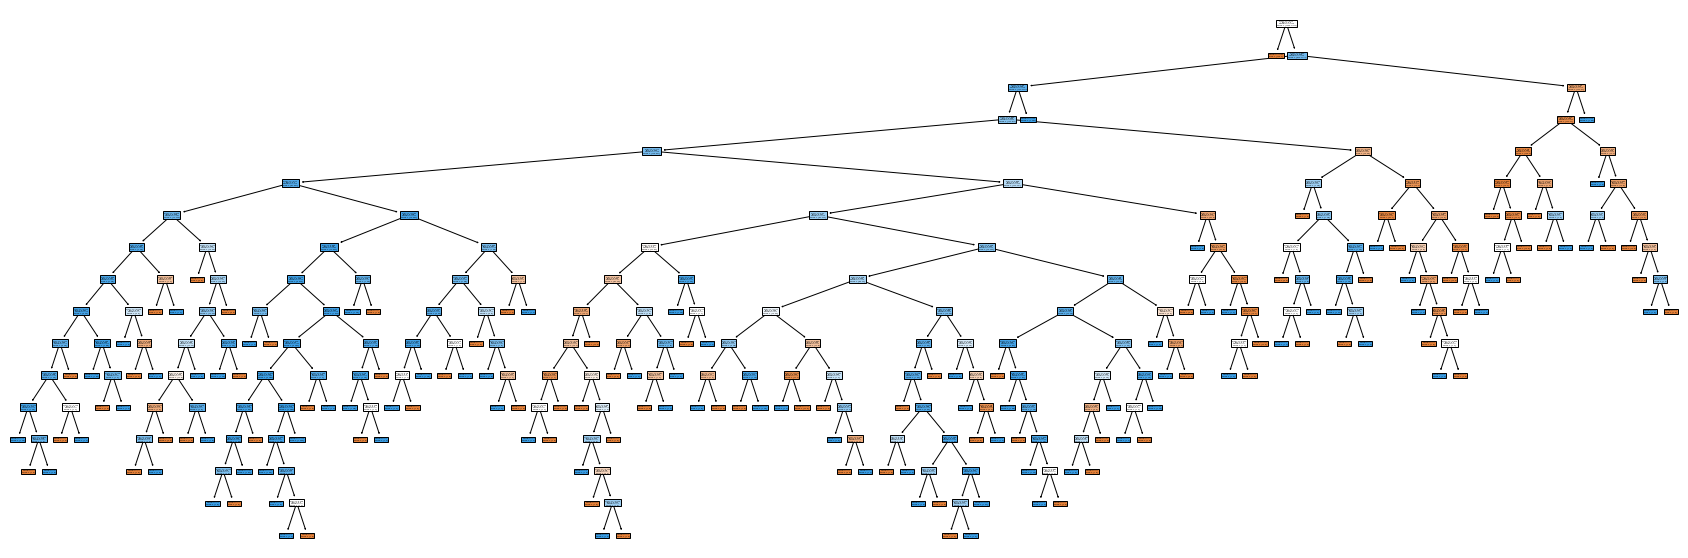

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30,10))
plot_tree(dt, filled=True)
plt.show()

    On constate que le score du train test est égal à 1 : il s'agit d'un sur-apprentissage qui va biaiser notre estimateur.
    L'indice le plus crucial est celui des faux-positifs car cela empêcherai la détection d'un éventuel churner.
    Faux-positifs = 50
    Cet arbre est trop grand et non concluant.

In [ ]:
#Trouver les meilleurs parametres en utilisant GridSearch
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,10)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=5)
best_model = grid.fit(X_train, y_train)
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 6}


In [ ]:
 for i in range(1,best_model.best_estimator_.get_params()['max_depth']+1):
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=i,random_state=0)
    dt.fit(X_train, y_train)
    print('Le train score est :', dt.score(X_train, y_train))
    print(i,'Le test score est :', dt.score(X_test, y_test))
    y_pred_dt = dt.predict(X_test)
    print(confusion_matrix(y_test, y_pred_dt))
#On va choisir max_depth = 4 car nous allons utiliser :
#-un nombre minimal de noeuds égal à 5
#-avec une precision presque égal
#-reduction des faux positifs : 50 > 16 > 14

Le train score est : 0.8645235361653272
1 Le test score est : 0.8733273862622658
[[420 142]
 [  0 559]]
Le train score est : 0.8645235361653272
2 Le test score est : 0.8733273862622658
[[420 142]
 [  0 559]]
Le train score est : 0.9092996555683123
3 Le test score est : 0.8947368421052632
[[450 112]
 [  6 553]]
Le train score est : 0.9242250287026407
4 Le test score est : 0.903657448706512
[[476  86]
 [ 22 537]]
Le train score est : 0.9276693455797933
5 Le test score est : 0.9081177520071365
[[473  89]
 [ 14 545]]
Le train score est : 0.9387676999617298
6 Le test score est : 0.9170383586083853
[[485  77]
 [ 16 543]]


In [ ]:
#modele optimal
dt = DecisionTreeClassifier(criterion=best_model.best_estimator_.get_params()['criterion'],
                            max_depth=5,
                            random_state=best_model.best_estimator_.get_params()['random_state'])
dt.fit(X_train, y_train)
print('Le train score est :', dt.score(X_train, y_train))
print('Le test score est :', dt.score(X_test, y_test))
dttrain='{:.3f}'.format(dt.score(X_train, y_train))
dttest='{:.3f}'.format(dt.score(X_test, y_test))

Le train score est : 0.9276693455797933
Le test score est : 0.9081177520071365


[[473  89]
 [ 14 545]]


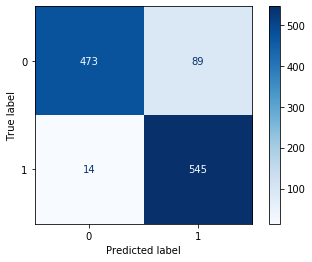

In [ ]:
#Evaluation
#matrice de confusion
from sklearn.metrics import confusion_matrix
y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

print(confusion_matrix(y_test, y_pred_dt))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [ ]:
#evaluation
#metriques d'evaluation
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt, digits=8 ))
print(dt.feature_importances_)

              precision    recall  f1-score   support

           0  0.97125257 0.84163701 0.90181125       562
           1  0.85962145 0.97495528 0.91366303       559

    accuracy                      0.90811775      1121
   macro avg  0.91543701 0.90829614 0.90773714      1121
weighted avg  0.91558638 0.90811775 0.90772128      1121

[0.         0.         0.         0.         0.00142063 0.02685732
 0.         0.         0.         0.         0.         0.
 0.01169296 0.84806696 0.00482864 0.         0.         0.
 0.         0.         0.         0.02972985 0.         0.
 0.         0.         0.07740364 0.         0.         0.        ]


In [ ]:
X.columns

Index(['Zip Code', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Online Security',
       'Streaming Movies', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'Churn Score', 'CLTV', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No internet service',
       'Tech Support_Yes', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Contract_One year', 'Contract_Two year',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')

In [ ]:
names = ['Zip Code', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Online Security',
       'Streaming Movies', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'Churn Score', 'CLTV', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No internet service',
       'Tech Support_Yes', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Contract_One year', 'Contract_Two year',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check']

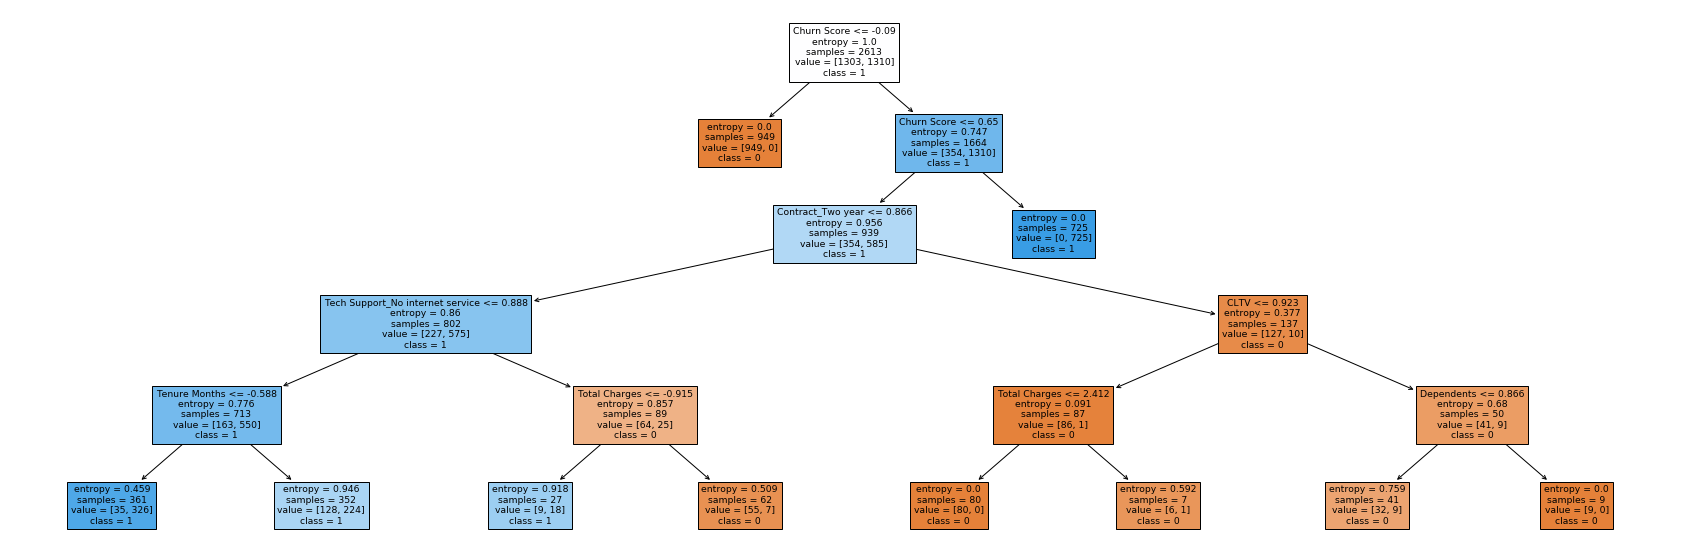

In [ ]:
#Visualisation du resultat
from sklearn.tree import plot_tree

plt.figure(figsize=(30,10))
plot_tree(dt,feature_names= names , class_names=['0','1'], filled=True)
plt.show()

In [ ]:
from sklearn.tree import export_text
print(export_text(dt,feature_names= names))

|--- Churn Score <= -0.09
|   |--- class: 0
|--- Churn Score >  -0.09
|   |--- Churn Score <= 0.65
|   |   |--- Contract_Two year <= 0.87
|   |   |   |--- Tech Support_No internet service <= 0.89
|   |   |   |   |--- Tenure Months <= -0.59
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Tenure Months >  -0.59
|   |   |   |   |   |--- class: 1
|   |   |   |--- Tech Support_No internet service >  0.89
|   |   |   |   |--- Total Charges <= -0.91
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Total Charges >  -0.91
|   |   |   |   |   |--- class: 0
|   |   |--- Contract_Two year >  0.87
|   |   |   |--- CLTV <= 0.92
|   |   |   |   |--- Total Charges <= 2.41
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Total Charges >  2.41
|   |   |   |   |   |--- class: 0
|   |   |   |--- CLTV >  0.92
|   |   |   |   |--- Dependents <= 0.87
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Dependents >  0.87
|   |   |   |   |   |--- class: 0
|   |--- Churn Score >  0.65
|   

# 2.Random forest

Text(0, 0.5, 'score')

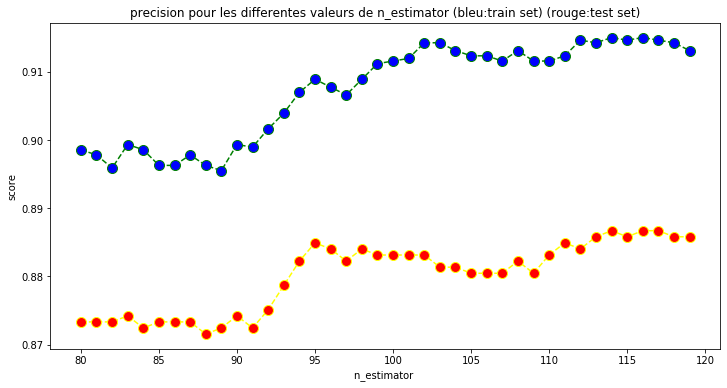

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

error = []
train_accuracy = []
test_accuracy = []

for i in range(80, 120):
    rf = RandomForestClassifier(n_estimators=i,max_depth=2, random_state=0)
    rf_model = rf.fit(X_train, y_train)
    pred_i = rf_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    train_accuracy.append(accuracy_score(y_train, rf_model.predict(X_train) ))
    test_accuracy.append(accuracy_score(y_test, pred_i))
plt.figure(figsize=(12, 6))
plt.plot(range(80, 120), train_accuracy, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(80, 120), test_accuracy, color='yellow', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('precision pour les differentes valeurs de n_estimator (bleu:train set) (rouge:test set)')
plt.xlabel('n_estimator ')
plt.ylabel('score')

In [ ]:
#choix du meilleur compromis entre precision et complexité (nombre d'arbres à generer : score testset)
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve , auc

#Apply RandomForest Algorithm
random_classifier= RandomForestClassifier(n_estimators=95,max_depth=5, random_state=0)
random_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=95, random_state=0)

In [ ]:
y_pred_rf_train = random_classifier.predict(X_train)
y_pred_rf = random_classifier.predict(X_test)
#Classification Report
print(classification_report(y_test,y_pred_rf))

rftrain='{:.3f}'.format(random_classifier.score(X_train, y_train))
rftest='{:.3f}'.format(random_classifier.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       562
           1       0.89      0.95      0.92       559

    accuracy                           0.91      1121
   macro avg       0.92      0.91      0.91      1121
weighted avg       0.92      0.91      0.91      1121



Text(91.68, 0.5, 'predicted label')

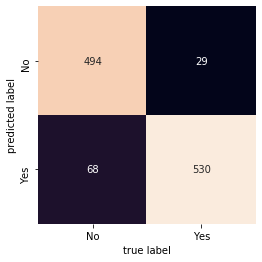

In [ ]:
#Confusion Matrix
mat_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(mat_rf.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

# 3.AdaBoost (adaptive boosting)
    AdaBoost (ou adaptive boosting) est, en intelligence artificielle et en apprentissage automatique, un méta-algorithme de boosting introduit par Yoav Freund et Robert Schapire1. Il peut être utilisé en association avec de nombreux autres
    types d'algorithmes d'apprentissage afin d'en améliorer les performances.

Text(0, 0.5, 'score')

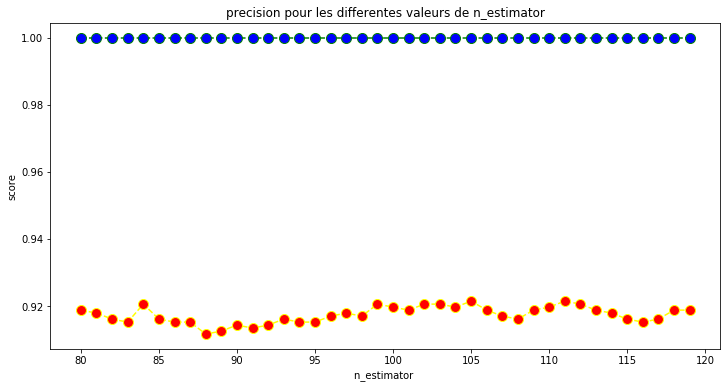

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

error = []
train_accuracy = []
test_accuracy = []

for i in range(80, 120):
    clf = AdaBoostClassifier(base_estimator=dt,n_estimators=i, random_state=0)
    clf_model = clf.fit(X_train, y_train)
    pred_i = clf_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    train_accuracy.append(accuracy_score(y_train, clf_model.predict(X_train) ))
    test_accuracy.append(accuracy_score(y_test, pred_i))
plt.figure(figsize=(12, 6))
plt.plot(range(80, 120), train_accuracy, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(80, 120), test_accuracy, color='yellow', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('precision pour les differentes valeurs de n_estimator')
plt.xlabel('n_estimator ')
plt.ylabel('score')

In [ ]:
#choix du meilleur compromis entre precision et complexité (maximiser le score du testset et minimiser la complexité)
from sklearn.metrics import roc_curve , auc

#Adaboost Algorithm
AdaBoost_classifier= AdaBoostClassifier(base_estimator=dt,n_estimators=84, random_state=0)
AdaBoost_classifier.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=5,
                                                         random_state=0),
                   n_estimators=84, random_state=0)

In [ ]:
y_pred_ab_train = AdaBoost_classifier.predict(X_train)
y_pred_ab= AdaBoost_classifier.predict(X_test)
#Classification Report
print(classification_report(y_test,y_pred_ab))

abtrain='{:.3f}'.format(AdaBoost_classifier.score(X_train, y_train))
abtest='{:.3f}'.format(AdaBoost_classifier.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       562
           1       0.90      0.94      0.92       559

    accuracy                           0.92      1121
   macro avg       0.92      0.92      0.92      1121
weighted avg       0.92      0.92      0.92      1121



Text(91.68, 0.5, 'predicted label')

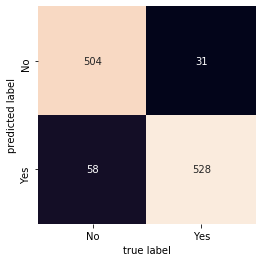

In [ ]:
#Confusion Matrix
mat_rf = confusion_matrix(y_test, y_pred_ab)
sns.heatmap(mat_rf.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
#Classification Report : score d'arbre de decision boosté
print(classification_report(y_test,y_pred_ab))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       562
           1       0.90      0.94      0.92       559

    accuracy                           0.92      1121
   macro avg       0.92      0.92      0.92      1121
weighted avg       0.92      0.92      0.92      1121



In [ ]:
#Classification Report : score d'arbre de decision non boosté
print(classification_report(y_test, y_pred_dt, digits=8 ))

              precision    recall  f1-score   support

           0  0.97125257 0.84163701 0.90181125       562
           1  0.85962145 0.97495528 0.91366303       559

    accuracy                      0.90811775      1121
   macro avg  0.91543701 0.90829614 0.90773714      1121
weighted avg  0.91558638 0.90811775 0.90772128      1121



In [ ]:
#->on constate que l'arbre de décision boosté est plus percis que l'arbre de décision non boosté à hauteur de 2%

# 4.Réseaux de neurones : ANN
    C'est un système dont la conception est à l'origine schématiquement inspirée du fonctionnement des neurones biologiques, et qui par la suite s'est rapproché des méthodes statistiques.
    Dans notre cas, nous allons utiliser 2 couches cachés de 12 noeuds chacune afin d'etablir un bon compromis biais/variance (équilibre entre qualité d’apprentissage et qualité de prévision)
    + une couche de sortie d'un noeud

In [ ]:
#conda install -c conda-forge keras
from keras.models import Sequential
from keras.layers import Dense


ann_classifier= Sequential()#initialisation de ANN Classifier

#Adding Hidden Layer1
ann_classifier.add(Dense(12,activation='relu',kernel_initializer='uniform',input_dim=X.shape[1]))
#Adding Hidden Layer2
ann_classifier.add(Dense(12,activation='relu',kernel_initializer='uniform'))
#Adding output Layer
ann_classifier.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))
#Compile them Model
ann_classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

#summary
ann_classifier.summary()

Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#comprehension 'param'
(X.shape[1]+1)*12#length input nodes +1 * length 1 hidden layer(=12)
(12+1)*12

156

In [ ]:
%time ann_classifier.fit(X_train,y_train,batch_size=10,epochs=100)


Epoch 1/100
2613/2613 [==============================] - 2s 808us/step - loss: 0.4983 - accuracy: 0.7891
Epoch 2/100
2613/2613 [==============================] - 1s 414us/step - loss: 0.2441 - accuracy: 0.8932
Epoch 3/100
2613/2613 [==============================] - 1s 422us/step - loss: 0.2062 - accuracy: 0.9158
Epoch 4/100
2613/2613 [==============================] - 1s 405us/step - loss: 0.1973 - accuracy: 0.9181
Epoch 5/100
2613/2613 [==============================] - 1s 404us/step - loss: 0.1931 - accuracy: 0.9204
Epoch 6/100
2613/2613 [==============================] - 1s 440us/step - loss: 0.1905 - accuracy: 0.9212
Epoch 7/100
2613/2613 [==============================] - 1s 441us/step - loss: 0.1873 - accuracy: 0.9258
Epoch 8/100
2613/2613 [==============================] - 1s 445us/step - loss: 0.1848 - accuracy: 0.9254
Epoch 9/100
2613/2613 [==============================] - 1s 431us/step - loss: 0.1829 - accuracy: 0.9277
Epoch 10/100
2613/2613 [==============================

Epoch 76/100
2613/2613 [==============================] - 1s 368us/step - loss: 0.1327 - accuracy: 0.9506
Epoch 77/100
2613/2613 [==============================] - 1s 397us/step - loss: 0.1328 - accuracy: 0.9514
Epoch 78/100
2613/2613 [==============================] - 1s 389us/step - loss: 0.1303 - accuracy: 0.9476
Epoch 79/100
2613/2613 [==============================] - 1s 394us/step - loss: 0.1325 - accuracy: 0.9510
Epoch 80/100
2613/2613 [==============================] - 1s 379us/step - loss: 0.1292 - accuracy: 0.9502
Epoch 81/100
2613/2613 [==============================] - 1s 358us/step - loss: 0.1290 - accuracy: 0.9533
Epoch 82/100
2613/2613 [==============================] - 1s 368us/step - loss: 0.1289 - accuracy: 0.9514
Epoch 83/100
2613/2613 [==============================] - 1s 381us/step - loss: 0.1293 - accuracy: 0.9525
Epoch 84/100
2613/2613 [==============================] - 1s 412us/step - loss: 0.1281 - accuracy: 0.9537
Epoch 85/100
2613/2613 [======================

In [ ]:
y_pred_proba_train = ann_classifier.predict(X_train)
y_pred_proba= ann_classifier.predict(X_test)#Get Prediction Probability

y_pred_ann= (y_pred_proba>.5).astype('int')#Convert Prediction to Int : seuil 0.5
#on a choisi un seuil de 0.5 car la cible est identiquement distribuée

Text(91.68, 0.5, 'predicted label')

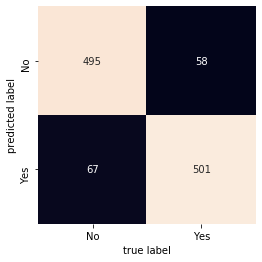

In [ ]:
#Confusion Matrix

mat_rf = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(mat_rf.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
#resultat acceptable

In [ ]:
print(X_train.shape,' ',y_pred_proba_train.shape)

(2613, 30)   (2613, 1)


In [ ]:
#Evaluation
from sklearn.metrics import  classification_report
from sklearn import metrics

y_pred_proba_train= ann_classifier.predict(X_train)#Get Prediction Probability

y_pred_train= (y_pred_proba_train>.5).astype('int')

y_pred_proba_test= ann_classifier.predict(X_test)#Get Prediction Probability

y_pred_test= (y_pred_proba_test>.5).astype('int')

print("Accuracy on Train Set ==> ",metrics.accuracy_score(y_train,y_pred_train))
print("Accuracy on Test Set ==> ",metrics.accuracy_score(y_test,y_pred_test))
anntrain='{:.3f}'.format(metrics.accuracy_score(y_train,y_pred_train))
anntest='{:.3f}'.format(metrics.accuracy_score(y_test,y_pred_test))

#Print Classification Report
print(classification_report(y_test,y_pred_ann))

Accuracy on Train Set ==>  0.9621125143513203
Accuracy on Test Set ==>  0.8884924174843889
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       562
           1       0.88      0.90      0.89       559

    accuracy                           0.89      1121
   macro avg       0.89      0.89      0.89      1121
weighted avg       0.89      0.89      0.89      1121



# 5.K-Means

In [ ]:
#Modelisation
import numpy as np
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=2);
kmeans.fit(X);
#index trié des groupes :
idk = np.argsort(kmeans.labels_);
print(idk)

#affichage des observations et leurs groupes : resultat
print(kmeans.labels_);
#distances aux centres de classes des observations
print(kmeans.transform(X));
#correspondance avec les groupes réels  : table de contingence
pd.crosstab(y,kmeans.labels_)

y_pred_km = kmeans.labels_

[   0 2192 2194 ... 3042 3027 3015]
[0 0 0 ... 0 0 0]
[[3667.44747054 6493.85001265]
 [3820.12524436 6625.99443603]
 [3694.82803648 5687.19121439]
 ...
 [3274.26412225 6238.48020008]
 [ 836.67867385 3626.03240374]
 [1565.66803036 5485.30923409]]


In [ ]:
#evaluation
from sklearn.metrics import silhouette_samples, silhouette_score

score = silhouette_score(X, kmeans.labels_, metric='euclidean')
silhouette_km = score

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.407


In [ ]:
#Centroides
kmeans.cluster_centers_


array([[9.34766292e+04, 5.07747748e-01, 1.80540541e-01, 3.54954955e-01,
        1.66126126e-01, 1.72169369e+01, 8.93333333e-01, 3.31171171e-01,
        1.61081081e-01, 2.80360360e-01, 6.15855856e-01, 5.91689910e+01,
        9.00938613e+02, 6.81023423e+01, 4.10789225e+03, 4.47927928e-01,
        2.28828829e-01, 2.28828829e-01, 2.03963964e-01, 2.28828829e-01,
        2.05405405e-01, 2.28828829e-01, 1.50630631e-01, 2.28828829e-01,
        2.80360360e-01, 1.25765766e-01, 9.83783784e-02, 1.64324324e-01,
        4.25225225e-01, 2.58738739e-01],
       [9.35686246e+04, 5.20333681e-01, 2.31491137e-01, 6.67361835e-01,
        1.98123045e-01, 5.74171011e+01, 9.46819604e-01, 7.42440042e-01,
        4.99478624e-01, 7.33055266e-01, 7.19499479e-01, 9.15246611e+01,
        5.23830141e+03, 6.16465068e+01, 5.00899062e+03, 7.02815433e-01,
        2.77555756e-16, 2.77555756e-16, 6.60062565e-01, 2.77555756e-16,
        6.68404588e-01, 2.77555756e-16, 5.04692388e-01, 2.77555756e-16,
        7.35140772e-01,

C:\Users\nadhir\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


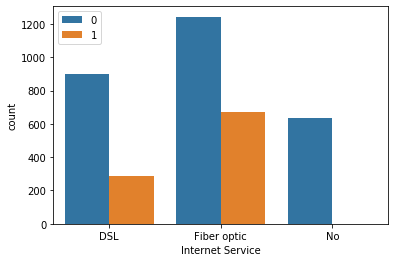

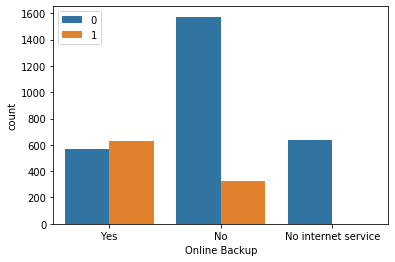

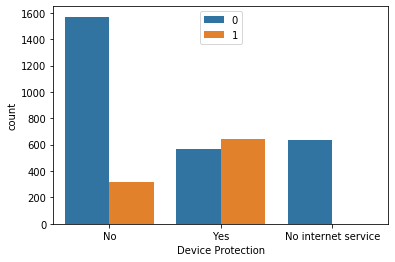

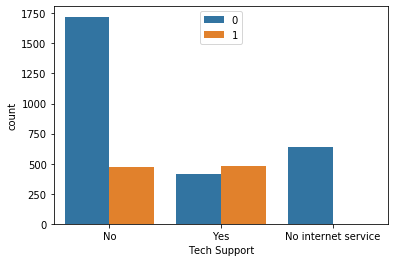

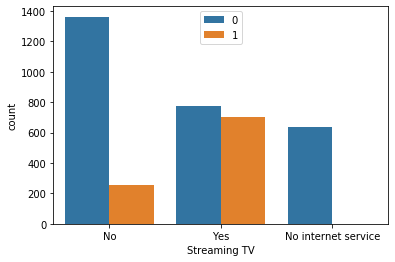

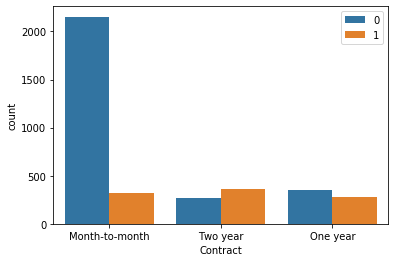

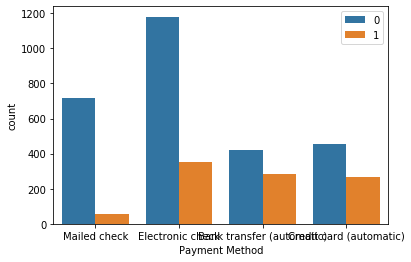

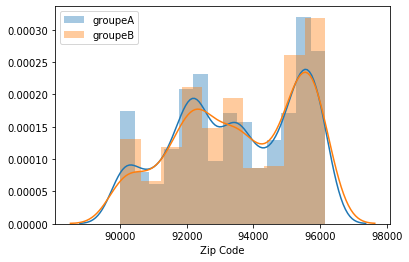

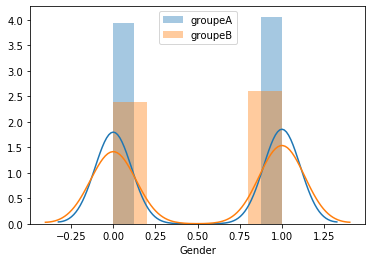

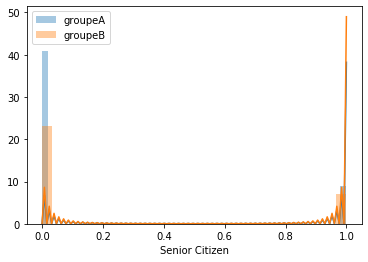

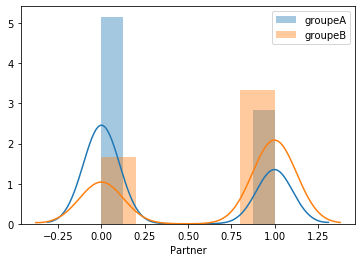

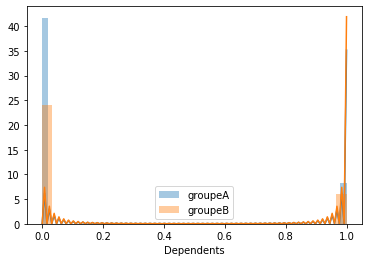

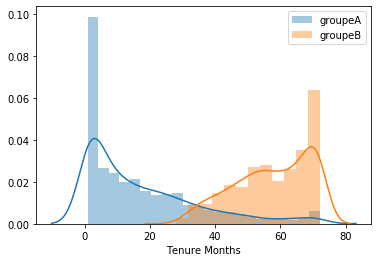

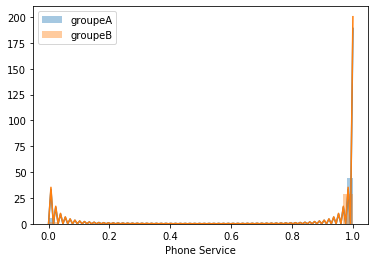

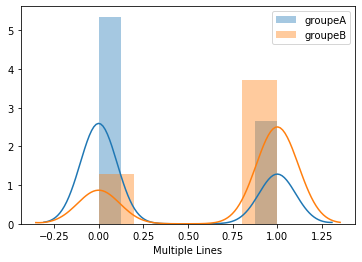

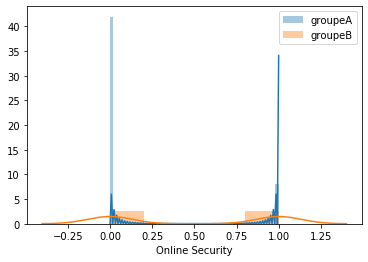

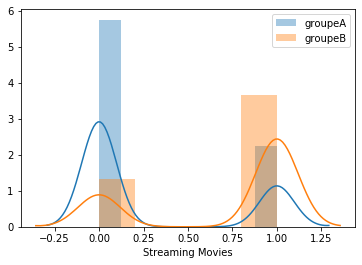

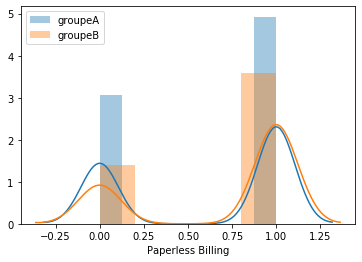

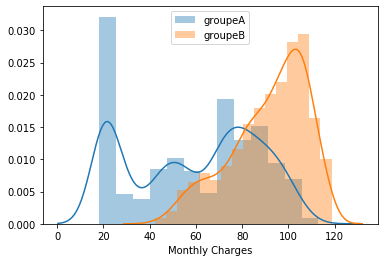

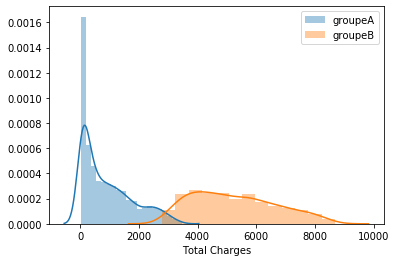

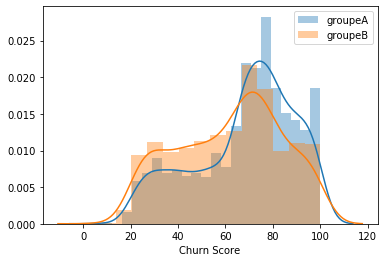

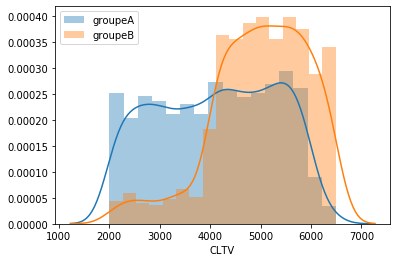

In [ ]:
#Profiling
groupeA=data[kmeans.labels_==0]

groupeB=data[kmeans.labels_==1]

data_predict = data
data_predict['Churn Value'] = kmeans.labels_

for col in (data_predict.columns[data_predict.dtypes==object]): #.drop('Churn Value')):
    plt.figure()
    sns.countplot(x=col,hue='Churn Value',data=data_predict)#Churn Value Predict
    plt.legend()


for col in (data.columns[data.dtypes!=object].drop('Churn Value')): #.drop('Churn Value')):
    plt.figure()
    sns.distplot(groupeA[col],label='groupeA')
    sns.distplot(groupeB[col],label='groupeB')
    plt.legend()


In [ ]:
#Profiling
#Interpretation
# on constate que :
# GroupeA :  les services=No internet service , contrat mensuel , senior citizen=no ,
#           partner=no , tenure months[0,20] , payement:electronique , multiple lines=no,
#           monthly charges=[20,40] , total charges=[0,2000] , CLTV=[2000,4000]
# GroupeB : contrat mensuel , sernior citizen=yes ,
#            dependents=yes, tenure months>40 , phone service=yes , monthly charges>100
#            total charges>4000 , CLTV>4000

In [ ]:
#Profiling
#Conclusion
#GroupeA : churn value = 1 : Les clients qui ont quitté
#GroupeB : churn value = 0 : Les clients restant

# 6.CAH (Classification Ascendante Hiérarchique)

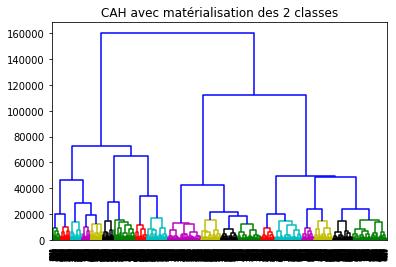

In [ ]:
#visualisation : dendrogramme
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

#générer la matrice des distances
Z = linkage(X,method='ward',metric='euclidean')

#affichage du dendrogramme
# matérialisation des deux classes (hauteur t = 17500)
plt.title('CAH avec matérialisation des 2 classes')
dendrogram(Z,labels=X.index,orientation='top',color_threshold=17500)
plt.show()


    ->Il est possible d'observer sur le dendrogramme obtenu que deux groupes sont bel et bien séparables.

In [ ]:
#modelisation
from sklearn.cluster import AgglomerativeClustering

cah = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cah.fit(X)

#index triés des groupes :
idk = np.argsort(cah.labels_);
print(idk)

#affichage des observations et leurs groupes : resultat
print(cah.labels_);
#correspondance avec les groupes réels  : table de contingence
pd.crosstab(y,cah.labels_)

y_pred_cah = cah.labels_

[   0 2096 2097 ... 2438 2453 2571]
[0 0 0 ... 0 0 0]


In [ ]:
#evaluation
from sklearn.metrics import silhouette_samples, silhouette_score

score = silhouette_score(X, cah.labels_, metric='euclidean')

silhouette_cah = score

print('Silhouette Score: %.3f' % score)

Silhouetter Score: 0.348


C:\Users\nadhir\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


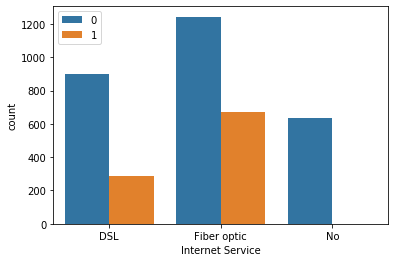

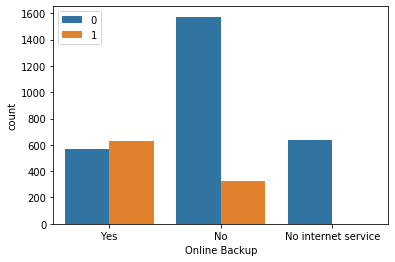

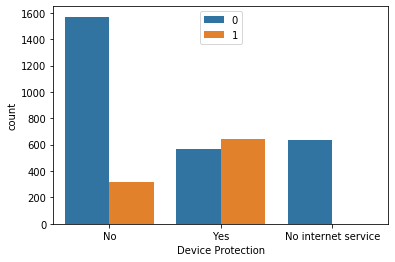

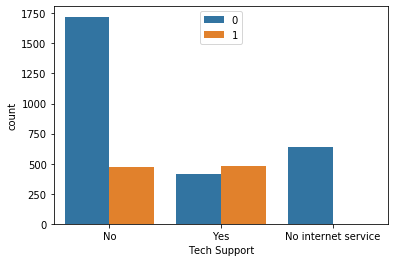

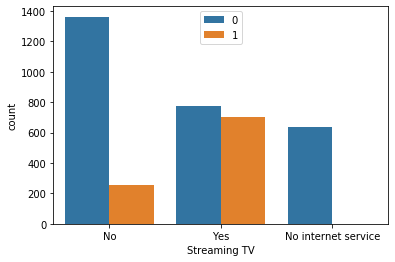

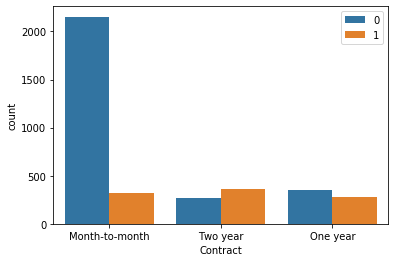

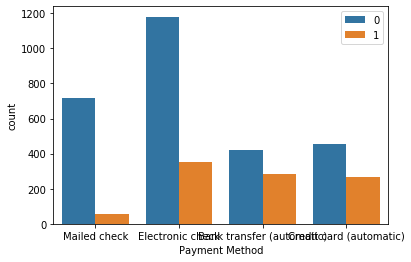

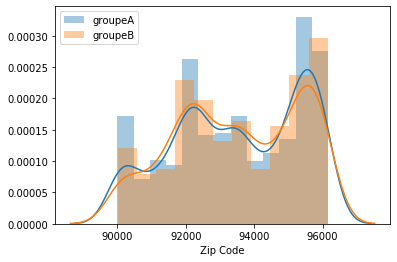

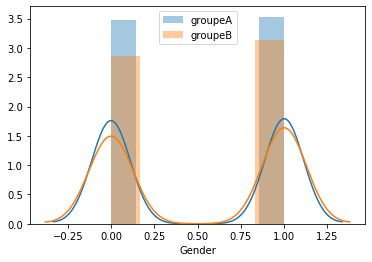

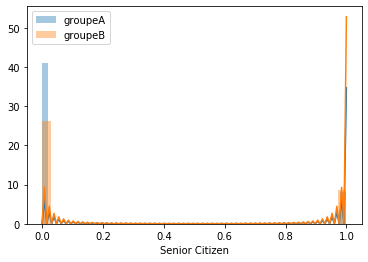

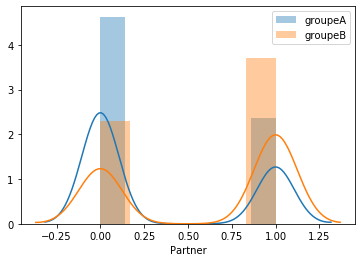

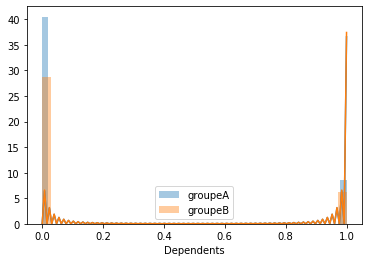

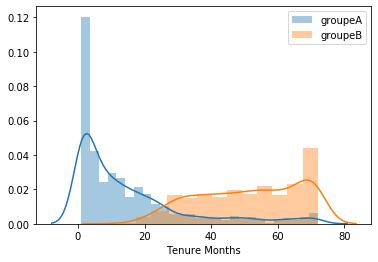

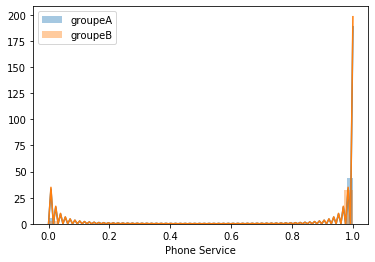

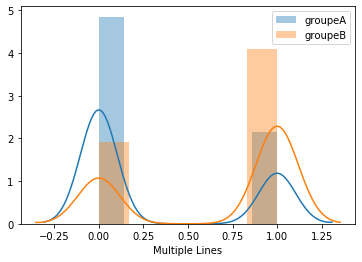

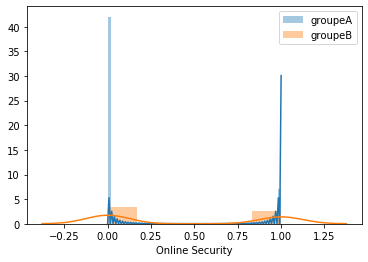

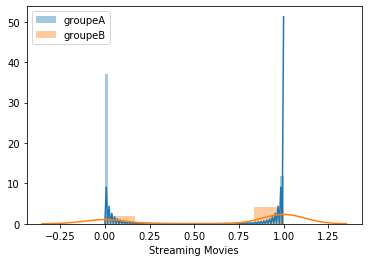

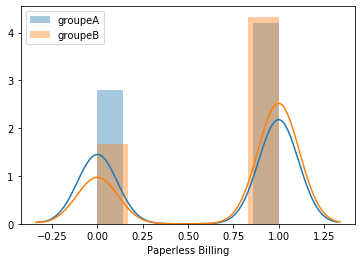

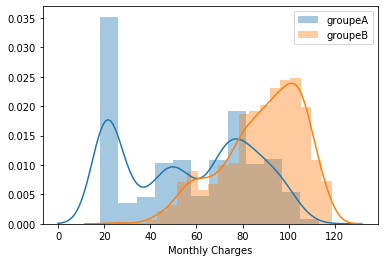

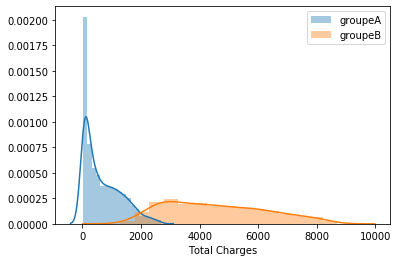

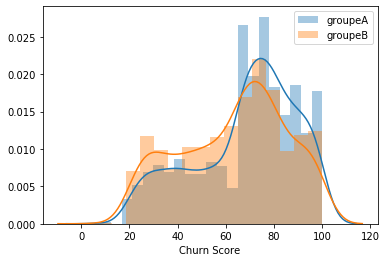

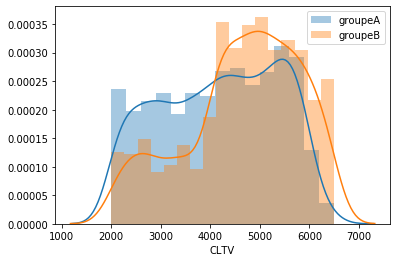

In [ ]:
#Profiling
groupeA=data[cah.labels_==0]

groupeB=data[cah.labels_==1]

data_predict = data
data_predict['Churn Value'] = kmeans.labels_

for col in (data_predict.columns[data_predict.dtypes==object]): #.drop('Churn Value')):
    plt.figure()
    sns.countplot(x=col,hue='Churn Value',data=data_predict)
    plt.legend()


for col in (data.columns[data.dtypes!=object].drop('Churn Value')): #.drop('Churn Value')):
    plt.figure()
    sns.distplot(groupeA[col],label='groupeA')
    sns.distplot(groupeB[col],label='groupeB')
    plt.legend()

In [ ]:
#Profiling
#Interpretation
# on constate que :
# GroupeA :  les services=No internet service , contrat mensuel , senior citizen=no ,
#           partner=no , tenure months[0,40] , payement:electronique ,
#           monthly charges=[20,60] , total charges=[0,2000] , CLTV=[2000,3000]
# GroupeB : contrat mensuel , sernior citizen=yes ,
#            dependents=yes, tenure months>50 , phone service=yes , monthly charges>105
#            total charges>5000 , CLTV>4000

In [ ]:
#Profiling
#Conclusion
#GroupeA : churn value = 1 : Les clients qui ont quitté
#GroupeB : churn value = 0 : Les clients restant

### 5-Comparaison

    1.Comparaison des algorithmes supervisés

In [ ]:
#1.Comparaison des algorithmes supervisés
training = pd.Series([dttrain,rftrain,abtrain,anntrain],
        index=['Arbre de decision', 'Random Forest', 'Arbre de decision+AdaBoost','Réseaux de neurones'])
testing = pd.Series([dttest,rftest,abtest,anntest],
        index=['Arbre de decision', 'Random Forest', 'Arbre de decision+AdaBoost','Réseaux de neurones'])
accuracy = pd.DataFrame({'Score accuracy training': training, 'Score accuracy testing': testing})
accuracy

,Score accuracy training,Score accuracy testing
Arbre de decision,0.928,0.908
Random Forest,0.941,0.913
Arbre de decision+AdaBoost,1.000,0.921
Réseaux de neurones,0.962,0.888


    On constate pour tous les modèles que les scores d'entaînements sont sont supéreurs à ceux des tests.
    On remarque aussi que l'algorithme d'adaBoost a permis d'augmenter la précision du modèle de l'arbre de décision.
    Néanmoins, ce dernier est maintenant en sur-apprentissage (train_score = 1.0).
    En outre, l'arbre de décision boosté est le plus précis suivi de random forest puis de l'arbre de décision.
    L'ANN est en dernière place.

    2.Comparaison des algorithmes non supervisés

In [ ]:
#2.Comparaison des algorithmes non supervisés
silhouette = pd.Series([silhouette_km,silhouette_cah],
        index=['K-Means', 'cah'])
accuracy = pd.DataFrame({'Silhouette': silhouette})
accuracy

,Silhouette
K-Means,0.406751
cah,0.348168


    Afin de comparer des modèles d'apprentissage non supervisés, il faut avoir recours à une metrique appelée "Silhouette"
    qui est calculée utilisant la distance intra-cluster et la distance moyenne du plus proche cluster pour chaque individu.
    Un score de silhouette plus proche de 1 est plus désirable afin d'éviter l'empattement (ovelapping) des clusters.
    Ainsi, K-Means est le modèle le plus adapté à) ce problème.